<a href="https://colab.research.google.com/github/JoyJiang97/NRC_vote_data/blob/main/Replicate_figures_and_tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!rm -rf NRC_vote_data
!git clone https://github.com/JoyJiang97/NRC_vote_data.git
%cd NRC_vote_data
!ls -lah


Cloning into 'NRC_vote_data'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 76 (delta 19), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 6.77 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (19/19), done.
/content/NRC_vote_data/NRC_vote_data
total 3.0M
drwxr-xr-x 3 root root 4.0K Jan 26 05:05 .
drwxr-xr-x 4 root root 4.0K Jan 26 05:05 ..
drwxr-xr-x 8 root root 4.0K Jan 26 05:05 .git
-rw-r--r-- 1 root root 2.9M Jan 26 05:05 NRC_vote_data.csv
-rw-r--r-- 1 root root 2.1K Jan 26 05:05 README.md


In [19]:
!pip -q install pandas numpy matplotlib scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [20]:
csv_path = Path("NRC_vote_data.csv")
assert csv_path.exists(), f"Expected {csv_path} in repo root. Found: {list(Path('.').glob('*.csv'))}"

df = pd.read_csv(csv_path)
display(df.head())
print("\nShape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.info()


,SECY_number,SRM_description,SRM_date,SRM_year,SRM_url,SECY_description,SECY_date,SECY_year,SECY_url,detailed_type,...,commissioner_count_SRM,commissioner_count_average,is_commissioner_count_consistent,congress_majority,presidency_party,voter_party_code,same_chair,voter_congress_diff,voter_presidency_diff,post_Ostendorff
0,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlin...,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_li...,Pilot Program for NMSS Initiative on Streamlin...,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,...,5,5.0,1,1.0,0,1.0,True,0.0,1.0,False
1,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlin...,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_li...,Pilot Program for NMSS Initiative on Streamlin...,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,...,5,5.0,1,1.0,0,0.0,True,1.0,0.0,False
2,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlin...,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_li...,Pilot Program for NMSS Initiative on Streamlin...,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,...,5,5.0,1,1.0,0,0.0,True,1.0,0.0,False
3,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlin...,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_li...,Pilot Program for NMSS Initiative on Streamlin...,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,...,5,5.0,1,1.0,0,1.0,True,0.0,1.0,False
4,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlin...,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_li...,Pilot Program for NMSS Initiative on Streamlin...,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,...,5,5.0,1,1.0,0,0.0,True,1.0,0.0,False



Shape: (4430, 48)

Columns:
 ['SECY_number', 'SRM_description', 'SRM_date', 'SRM_year', 'SRM_url', 'SECY_description', 'SECY_date', 'SECY_year', 'SECY_url', 'detailed_type', 'voter_last_name', 'CVR_date', 'CVR_year', 'bdays_to_SRM', 'bdays_to_CVR', 'bdays_CVR_to_SRM', 'is_first_vote', 'is_last_vote', 'role_at_CVR', 'voter_party', 'voter_start_date', 'voter_end_date', 'voter_gender', 'chair_at_CVR', 'voter_days_served', 'voter_term_number', 'chair_at_SECY', 'chair_at_SECY_start_date', 'chair_at_SECY_end_date', 'role_at_SECY', 'SECY_before_term', 'bdays_to_CVR_original', 'bdays_to_SRM_original', 'next_chair', 'bdays_before_chair_end', 'responsible_chair', 'commissioner_count_SECY', 'commissioner_count_CVR', 'commissioner_count_SRM', 'commissioner_count_average', 'is_commissioner_count_consistent', 'congress_majority', 'presidency_party', 'voter_party_code', 'same_chair', 'voter_congress_diff', 'voter_presidency_diff', 'post_Ostendorff']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

#Figure 1


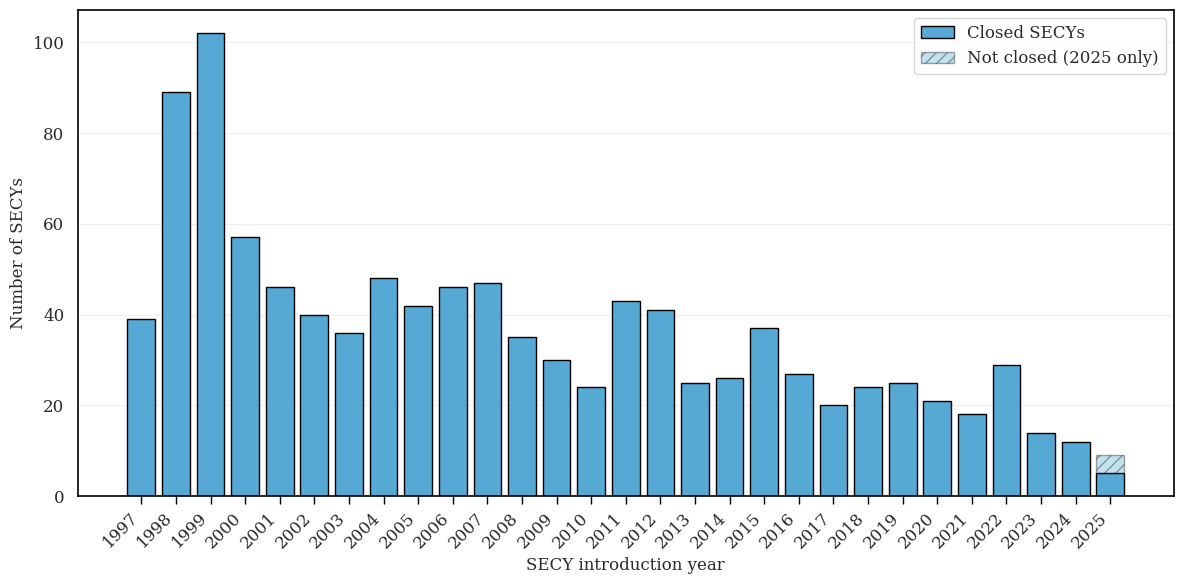

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # needed for robust numeric coercion

# =========================
# 0) Keep only what we need + robust year typing
# =========================
df_work = df[['SECY_number', 'SECY_year']].copy()
df_work['SECY_year'] = pd.to_numeric(df_work['SECY_year'], errors='coerce')
df_work = df_work.dropna(subset=['SECY_number', 'SECY_year']).copy()
df_work['SECY_year'] = df_work['SECY_year'].astype(int)

# =========================
# 1) De-duplicate: keep one row per SECY_number
# =========================
df_one_secy = df_work.drop_duplicates(subset=['SECY_number'], keep='first').copy()

# =========================
# 2) Group by year and count SECYs
# =========================
sec_year_count = (df_one_secy
                  .groupby('SECY_year')
                  .size()
                  .reset_index(name='count')
                  .sort_values('SECY_year'))

years = sec_year_count['SECY_year'].to_numpy()
counts = sec_year_count['count'].to_numpy()

# =========================
# 3) Plot styling
# =========================
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

bar_width = 0.8

# Base bars (closed)
ax.bar(
    years,
    counts,
    width=bar_width,
    color="#56A9D5",
    edgecolor='black',
    align='center',
    label='Closed SECYs'
)

# =========================
# 4) Add shaded "not closed" segment for 2025 (+4)
# =========================
EXTRA_YEAR = 2025
EXTRA_NOT_CLOSED = 4

mask_2025 = (years == EXTRA_YEAR)

if mask_2025.any():
    base_2025 = counts[mask_2025][0]
    ax.bar(
        EXTRA_YEAR,
        EXTRA_NOT_CLOSED,
        width=bar_width,
        bottom=base_2025,
        color="#56A9D5",
        edgecolor='black',
        align='center',
        alpha=0.35,
        hatch='///',
        label=f'Not closed ({EXTRA_YEAR} only)'
    )
else:
    ax.bar(
        EXTRA_YEAR,
        EXTRA_NOT_CLOSED,
        width=bar_width,
        color="#56A9D5",
        edgecolor='black',
        align='center',
        alpha=0.35,
        hatch='///',
        label=f'Not closed ({EXTRA_YEAR} only)'
    )
    years = np.append(years, EXTRA_YEAR)

# =========================
# 5) Axes, ticks, grid, legend
# =========================
ax.set_xlabel('SECY introduction year', fontsize=12)
ax.set_ylabel('Number of SECYs', fontsize=12)

years_sorted = np.sort(np.unique(years))
ax.set_xticks(years_sorted)
ax.set_xticklabels(years_sorted, rotation=45, ha='right')

ax.tick_params(axis='x', which='major', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', which='major', direction='out', length=6, width=1, color='black')

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Legend (dedupe defensively)
handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels, handles))
ax.legend(uniq.values(), uniq.keys(), frameon=True)

plt.tight_layout()
plt.show()


##Figure 2

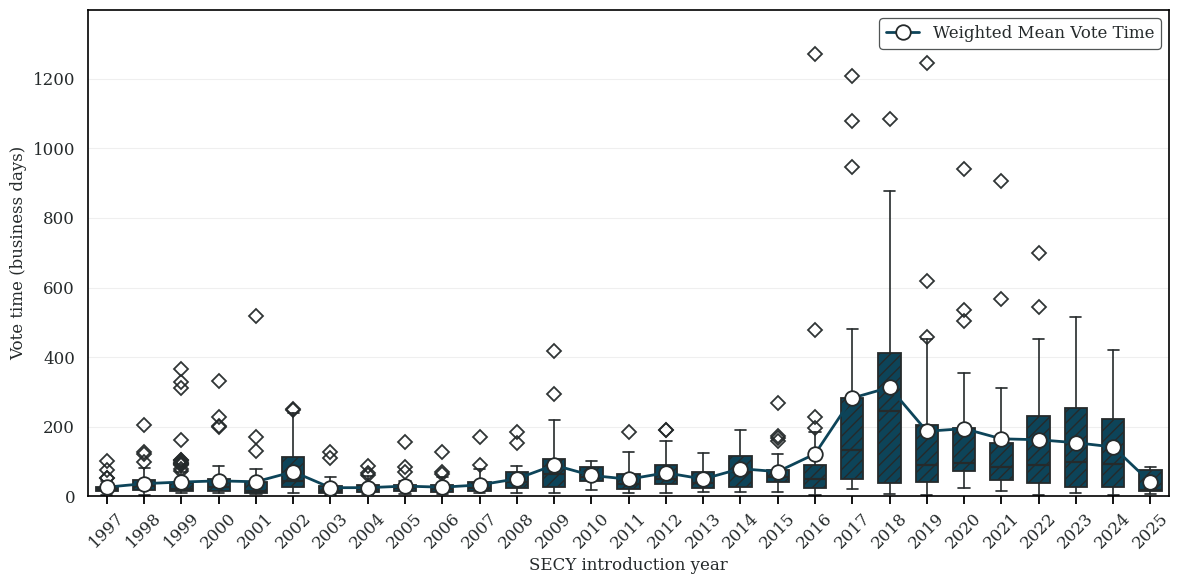

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Fonts (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# =========================================
# Brand palette (yours) — unchanged
# =========================================
PALETTE = {
    "navy":   "#0D4459",
    "teal":   "#0DC3A8",
    "sky":    "#56A9D5",
    "coal":   "#252A2B",
    "paper":  "#F8F9F9",
    "orange": "#EE5C36",
    "yellow": "#F8B944",
    "magenta":"#E82269",
}

# =========================================
# Mode — unchanged
# =========================================
MODE = "auto"

if MODE == "auto":
    BOX_FACE   = PALETTE["navy"]
    BOX_EDGE   = PALETTE["coal"]
    MEDIAN     = PALETTE["coal"]
    WHISKER    = PALETTE["coal"]
    CAP        = PALETTE["coal"]
    FLIER_EDGE = PALETTE["coal"]
    FLIER_MARK = "D"
    HATCH      = "///"
    MEAN_LINE  = PALETTE["navy"]
    MEAN_DOT_FACE = "white"
    MEAN_DOT_EDGE = PALETTE["coal"]
    ERROR_BAR  = PALETTE["navy"]
else:
    BOX_FACE   = "white"
    BOX_EDGE   = "#000000"
    MEDIAN     = "white"
    WHISKER    = "#000000"
    CAP        = "#000000"
    FLIER_EDGE = "#000000"
    FLIER_MARK = "D"
    HATCH      = "///"
    MEAN_LINE  = "#000000"
    MEAN_DOT_FACE = "white"
    MEAN_DOT_EDGE = "#000000"
    ERROR_BAR  = "#000000"

# =========================================
# 0) Data prep — UPDATED to match your definition:
#     unique_secy = rows where is_last_vote == True
# =========================================
YEAR_COL = "SECY_year"
TIME_COL = "bdays_to_CVR_original"
LAST_COL = "is_last_vote"

df_plot = df.loc[df[LAST_COL] == True].copy()
df_plot = df_plot.dropna(subset=[YEAR_COL, TIME_COL]).copy()

df_plot[YEAR_COL] = pd.to_numeric(df_plot[YEAR_COL], errors="coerce")
df_plot[TIME_COL] = pd.to_numeric(df_plot[TIME_COL], errors="coerce")
df_plot = df_plot.dropna(subset=[YEAR_COL, TIME_COL]).copy()
df_plot[YEAR_COL] = df_plot[YEAR_COL].astype(int)

years = np.array(sorted(df_plot[YEAR_COL].unique()))
pos = np.arange(len(years))
per_year_vals = [df_plot.loc[df_plot[YEAR_COL] == y, TIME_COL].values for y in years]

# 1) Means / 95% CI (no CI drawn) — unchanged
means = np.array([v.mean() if len(v) else np.nan for v in per_year_vals])
ns    = np.array([len(v) for v in per_year_vals])
stds  = np.array([v.std(ddof=1) if len(v) > 1 else 0.0 for v in per_year_vals])
sems  = np.where(ns > 0, stds / np.sqrt(ns), np.nan)
yerr  = 1.96 * sems

# =========================================
# 2) Plot — unchanged
# =========================================
plt.rcParams.update({
    'axes.grid': False,
    'figure.facecolor': 'white',
    'savefig.facecolor': 'white',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('white')

boxprops = dict(edgecolor=BOX_EDGE, linewidth=1.3, facecolor=BOX_FACE, hatch=HATCH)
ax.boxplot(
    per_year_vals,
    positions=pos,
    widths=0.6,
    patch_artist=True,
    showfliers=True,
    whis=1.5,
    boxprops=boxprops,
    medianprops=dict(color=MEDIAN, linewidth=1.6),
    whiskerprops=dict(color=WHISKER, linewidth=1.2),
    capprops=dict(color=CAP, linewidth=1.2),
    flierprops=dict(
        marker=FLIER_MARK,
        markersize=7,
        markerfacecolor='none',
        markeredgecolor=FLIER_EDGE,
        markeredgewidth=1.3,
        linestyle='none',
        alpha=0.95
    )
)

ax.errorbar(
    pos, means,
    fmt='-o',
    linewidth=2.0,
    markersize=10.5,
    color=MEAN_LINE,
    markerfacecolor=MEAN_DOT_FACE,
    markeredgecolor=MEAN_DOT_EDGE,
    markeredgewidth=1.3,
    zorder=3,
    label='Weighted Mean Vote Time'
)

# =========================================
# 3) Labels/ticks/limits — unchanged
# =========================================
ax.set_xlabel('SECY introduction year', color=PALETTE["coal"])
ax.set_ylabel('Vote time (business days)', color=PALETTE["coal"])

ax.set_xticks(pos)
ax.set_xticklabels(years, rotation=45, ha='center', color=PALETTE["coal"])

ax.tick_params(axis='x', which='major', direction='out', length=6, width=1.3, color='black', bottom=True, top=False)
ax.tick_params(axis='y', which='major', direction='out', length=6, width=1.3, color='black')

ax.set_xlim(pos[0] - 0.5, pos[-1] + 0.5)
ax.margins(x=0)

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

upper_boxes = np.array([np.nanmax(v) if len(v) else np.nan for v in per_year_vals], dtype=float)
upper_mean_ci = np.nanmax(means + yerr) if np.isfinite(np.nanmax(means + yerr)) else np.nan
candidates = np.r_[upper_boxes, upper_mean_ci]
if not np.all(np.isnan(candidates)):
    upper = np.nanmax(candidates)
    if np.isfinite(upper):
        ax.set_ylim(0, upper * 1.1)

leg = ax.legend(frameon=True, loc='upper right')
leg.get_frame().set_edgecolor(PALETTE["coal"])
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


##Figure 3


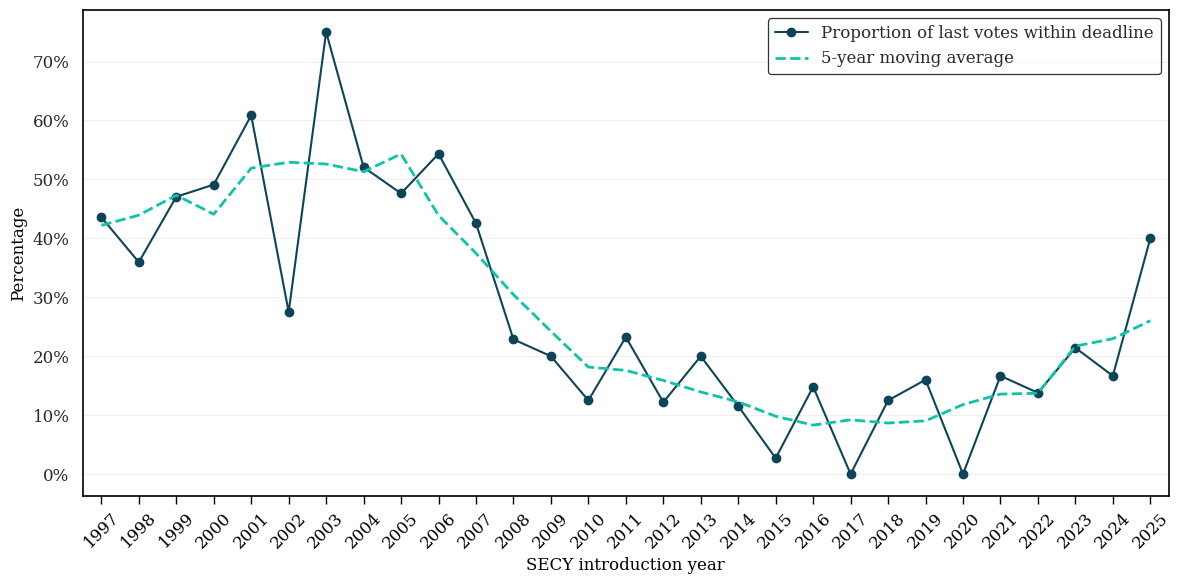

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# --- Font (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# =========================================
# 0) Filter for last votes only (NEW column names)
# =========================================
df_work = df.copy()

YEAR_COL = 'SECY_year'
TIME_COL = 'bdays_to_CVR_original'
LAST_COL = 'is_last_vote'

# Robust types (so comparisons/sorts do not fail silently)
df_work[YEAR_COL] = pd.to_numeric(df_work[YEAR_COL], errors='coerce')
df_work[TIME_COL] = pd.to_numeric(df_work[TIME_COL], errors='coerce')

# is_last_vote is already bool per your schema, but keep this robust anyway
if df_work[LAST_COL].dtype != bool:
    df_work[LAST_COL] = df_work[LAST_COL].astype(str).str.strip().str.lower().isin(['true', '1', 't', 'yes', 'y'])

# Drop rows missing required fields for this analysis
df_work = df_work.dropna(subset=[YEAR_COL, TIME_COL, 'detailed_type', LAST_COL]).copy()

# Keep last votes only
last_vote_secys = df_work[df_work[LAST_COL] == True].copy()

# Assign deadlines by detailed_type (your logic unchanged)
def get_deadline(row):
    if row['detailed_type'] == 'Proposed Rule':
        return 30
    elif row['detailed_type'] == 'Final Rule':
        return 60
    else:
        return 18

last_vote_secys['deadline'] = last_vote_secys.apply(get_deadline, axis=1)
last_vote_secys['on_time'] = last_vote_secys[TIME_COL] <= last_vote_secys['deadline']

# =========================================
# 1) Group by year and compute on-time proportion
# =========================================
proportion_by_year = (
    last_vote_secys.groupby(YEAR_COL, dropna=False)['on_time']
    .mean()
    .reset_index()
)

proportion_by_year = proportion_by_year[proportion_by_year[YEAR_COL] >= 1997]
proportion_by_year = proportion_by_year.sort_values(YEAR_COL).copy()

# 5-year moving average (centered)
proportion_by_year['moving_avg'] = (
    proportion_by_year['on_time'].rolling(window=5, center=True, min_periods=1).mean()
)

# Use numeric arrays for perfect alignment
years   = proportion_by_year[YEAR_COL].astype(int).to_numpy()
on_time = proportion_by_year['on_time'].to_numpy()
moving  = proportion_by_year['moving_avg'].to_numpy()

# Guard against empty results
if len(years) == 0:
    raise ValueError(f"No rows available after filtering ({LAST_COL}==True and {YEAR_COL}>=1997).")

# =========================================
# 2) Plot — consistent with Figures 1 & 2
# =========================================
fig, ax = plt.subplots(figsize=(12, 6))

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax.plot(
    years, on_time,
    marker='o', color='#0D4459',
    label='Proportion of last votes within deadline'
)
ax.plot(
    years, moving,
    linestyle='--', color='#0DC3A8', linewidth=2,
    label='5-year moving average'
)

# =========================================
# 3) Axes, ticks, and grid — match other figures
# =========================================
ax.set_xlabel('SECY introduction year', color='black')
ax.set_ylabel('Percentage', color='black')

ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='center', color='black')
ax.set_xlim(years[0] - 0.5, years[-1] + 0.5)
ax.margins(x=0)

ax.tick_params(axis='x', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

leg = ax.legend(frameon=True, loc='upper right')
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


##Figure 4

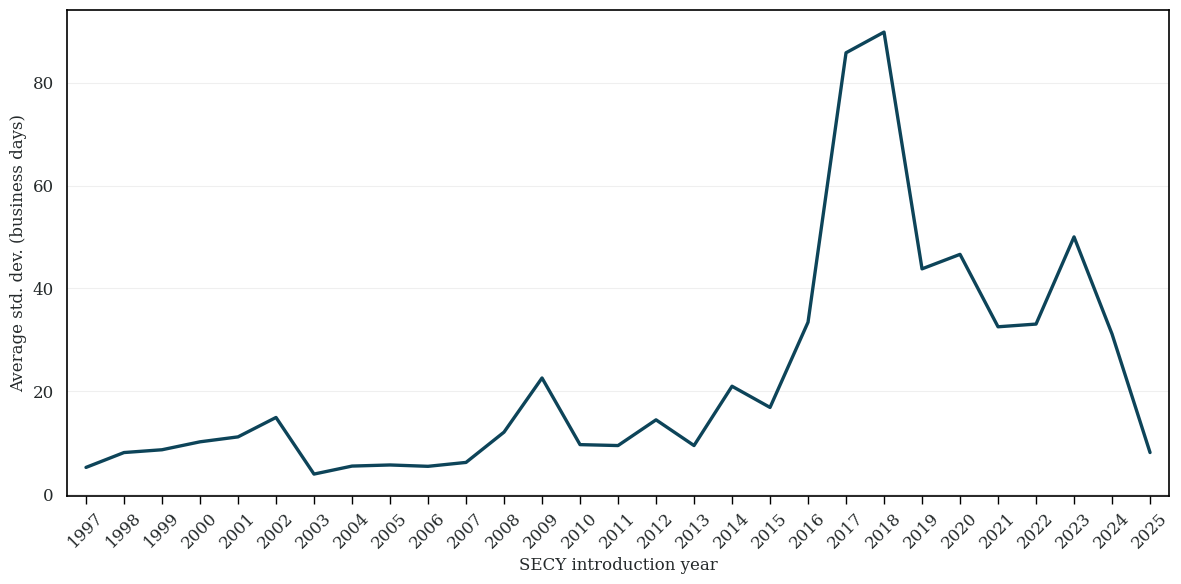

In [24]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# --- Fonts (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# ---- BRAND palette ----
PALETTE_NAVY = "#0D4459"
PALETTE_CHAR = "#252A2B"

# =========================
# 0) Build vote_timing_stats (SECY-level wide)
# =========================
YEAR_COL  = "SECY_year"
TIME_COL  = "bdays_to_CVR"   # swap if your old fig used a different timing
VOTER_COL = "voter_last_name"

df_work = df.copy()
df_work[YEAR_COL] = pd.to_numeric(df_work[YEAR_COL], errors="coerce")
df_work[TIME_COL] = pd.to_numeric(df_work[TIME_COL], errors="coerce")
df_work = df_work.dropna(subset=["SECY_number", YEAR_COL, TIME_COL, VOTER_COL]).copy()

# Use a more unique commissioner id to avoid last-name collisions
df_work["voter_id"] = (
    df_work["voter_last_name"].astype(str).str.strip()
    + "_"
    + df_work["voter_start_date"].astype(str).str.strip()
)

# ONE value per (SECY, commissioner): choose min (earliest).  Use max for "latest".
per_commissioner = (
    df_work.groupby(["SECY_number", "voter_id"])[TIME_COL]
      .min()
      .reset_index()
)

# Pivot to wide: SECY x commissioner
wide = per_commissioner.pivot(index="SECY_number", columns="voter_id", values=TIME_COL)

# Add SECY year back (one per SECY)
secy_year = df_work.groupby("SECY_number")[YEAR_COL].first()
vote_timing_stats = wide.join(secy_year.rename("SECY_year")).reset_index()

# Rename commissioner columns so your regex finds them
commissioner_cols = [c for c in vote_timing_stats.columns if c not in ["SECY_number", "SECY_year"]]
vote_timing_stats = vote_timing_stats.rename(columns={c: f"vote_{c}_day" for c in commissioner_cols})

# =========================
# 1) Your original figure logic (wide → row-wise std → avg by year)
# =========================
df_plot = vote_timing_stats.copy()
year_col = "SECY_year"   # NEW name

vote_day_cols = [c for c in df_plot.columns if re.search(r"vote.*day$", c, flags=re.IGNORECASE)]
if not vote_day_cols:
    raise ValueError("No per-commissioner vote-day columns were created. Check voter_id creation.")

# Compute row-wise std only when >=2 commissioner values exist
counts = df_plot[vote_day_cols].notna().sum(axis=1)
df_plot = df_plot[counts >= 2].copy()

df_plot["vote_std"] = df_plot[vote_day_cols].apply(
    lambda r: np.std(r.dropna().to_numpy(), ddof=0), axis=1
)

std_by_year = (
    df_plot.groupby(year_col, as_index=False)["vote_std"]
      .mean()
      .rename(columns={"vote_std": "avg_vote_std"})
      .sort_values(year_col)
)

years = std_by_year[year_col].astype(int).to_numpy()
stds  = std_by_year["avg_vote_std"].to_numpy()

if len(years) == 0:
    raise ValueError("No SECYs with >=2 commissioner values after pivot; cannot compute dispersion.")

# =========================
# 2) Plot (your style)
# =========================
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.plot(years, stds, linewidth=2.4, color=PALETTE_NAVY, linestyle="solid")

ax.set_xlabel("SECY introduction year", color=PALETTE_CHAR)
ax.set_ylabel("Average std. dev. (business days)", color=PALETTE_CHAR)

ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha="center", color=PALETTE_CHAR)
ax.set_xlim(years[0] - 0.5, years[-1] + 0.5)
ax.margins(x=0)

ax.tick_params(axis="x", direction="out", length=6, width=1, color="black", bottom=True, top=False)
ax.tick_params(axis="y", direction="out", length=6, width=1, color="black")

for spine in ax.spines.values():
    spine.set_color("black")
    spine.set_linewidth(1.2)

ax.grid(axis="y", linestyle="-", alpha=0.3)
ax.grid(axis="x", visible=False)

plt.tight_layout()
plt.show()


##Figure 5

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Font (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size']   = 12

# Brand palette (as provided)
PALETTE = {
    "navy":   "#0D4459",  # strong primary
    "teal":   "#0DC3A8",  # secondary
    "magenta":"#EE5C36",  # high-contrast accent (note: this hex is orange)
    "coal":   "#252A2B"   # axis/text
}

# =========================
# NEW schema column names
# =========================
SECY_ID  = "SECY_number"
YEAR_COL = "SECY_year"
TIME_COL = "bdays_to_CVR_original"

# =========================
# 1) Build SECY-level vote timing stats (across commissioners)
#    IMPORTANT: do NOT filter to is_last_vote here
# =========================
df_work = df.copy()
df_work = df_work.dropna(subset=[SECY_ID, YEAR_COL, TIME_COL]).copy()

df_work[YEAR_COL] = pd.to_numeric(df_work[YEAR_COL], errors="coerce")
df_work[TIME_COL] = pd.to_numeric(df_work[TIME_COL], errors="coerce")
df_work = df_work.dropna(subset=[YEAR_COL, TIME_COL]).copy()
df_work[YEAR_COL] = df_work[YEAR_COL].astype(int)

vote_timing_stats = (
    df_work.groupby(SECY_ID)[TIME_COL]
          .agg(first_vote_day="min",
               median_vote_day="median",
               last_vote_day="max")
          .reset_index()
)

# =========================
# 2) Group stats by year (same as your original)
# =========================
avg_by_year = (
    vote_timing_stats.groupby(YEAR_COL)[["first_vote_day","median_vote_day","last_vote_day"]]
    .mean()
    .reset_index()
    .sort_values(YEAR_COL)
)

# Numeric arrays for perfect x alignment
years  = avg_by_year[YEAR_COL].astype(int).to_numpy()
first  = avg_by_year["first_vote_day"].to_numpy()
median = avg_by_year["median_vote_day"].to_numpy()
last   = avg_by_year["last_vote_day"].to_numpy()

# Figure / axes
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Lines (unchanged styles)
ax.plot(years, first,  label='First vote',  linewidth=2.2, color=PALETTE["navy"],    linestyle='solid')
ax.plot(years, median, label='Median vote', linewidth=2.2, color=PALETTE["teal"],    linestyle='dashed')
ax.plot(years, last,   label='Last vote',   linewidth=2.2, color=PALETTE["magenta"], linestyle='dotted')

# Labels
ax.set_xlabel('SECY introduction year', color=PALETTE["coal"])
ax.set_ylabel('Avg. vote time (business days)', color=PALETTE["coal"])

# X ticks: show ALL years, centered; lock limits to remove offset/padding
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='center', color=PALETTE["coal"])
ax.set_xlim(years[0] - 0.5, years[-1] + 0.5)
ax.margins(x=0)

# Tick marks and border (consistent with other figures)
ax.tick_params(axis='x', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Only horizontal grid lines
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Legend (upper right) with border
leg = ax.legend(frameon=True, loc='upper right')
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


KeyError: 'SECY_year'

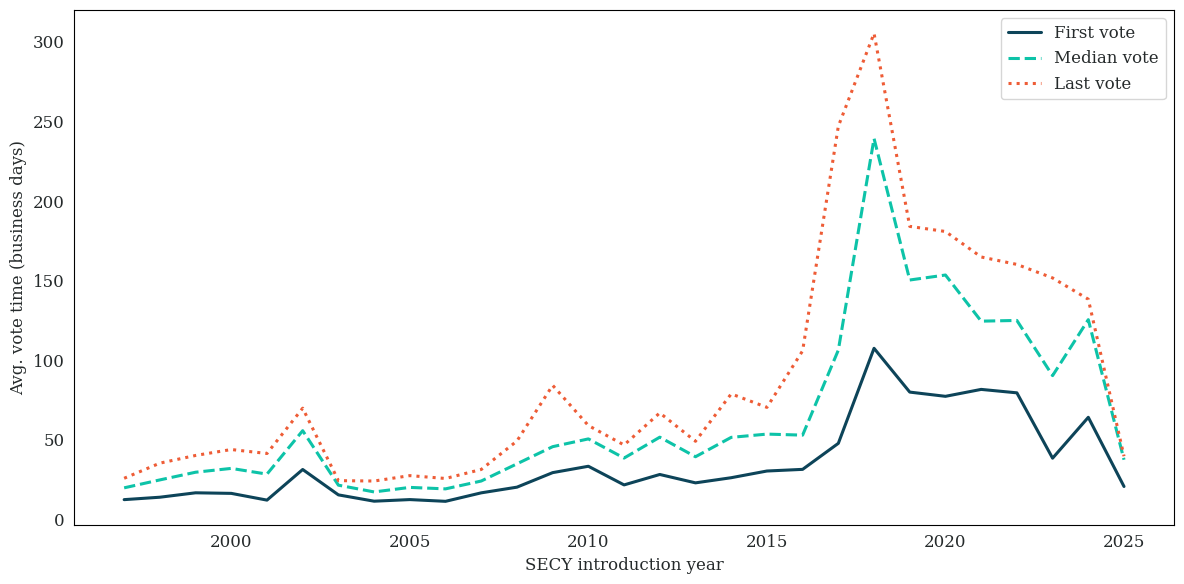

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Brand palette
PALETTE = {
    "navy":   "#0D4459",  # strong primary
    "teal":   "#0DC3A8",  # secondary
    "magenta":"#EE5C36",  # high-contrast accent
    "coal":   "#252A2B"   # axis/text
}

# New schema column names
SECY_ID  = "SECY_number"
YEAR_COL = "SECY_year"
TIME_COL = "bdays_to_CVR"

# =========================
# EXACT same logic as original:
# 1) group by SECY_number only (min/median/max)
# 2) merge year back in using drop_duplicates()
# 3) average by year
# 4) plot year averages
# =========================

# 1) Group by SECY Number and collect vote days
vote_timing_stats = (
    df.groupby(SECY_ID)[TIME_COL]
      .agg(first_vote_day="min",
           median_vote_day="median",
           last_vote_day="max")
      .reset_index()
)

# 2) Merge back to get SECY_year for plotting
vote_timing_stats = vote_timing_stats.merge(
    df[[SECY_ID, YEAR_COL]].drop_duplicates(),
    on=SECY_ID,
    how="left"
)

# 3) Group stats by year
avg_by_year = vote_timing_stats.groupby(YEAR_COL)[
    ["first_vote_day", "median_vote_day", "last_vote_day"]
].mean().reset_index()

# 4) Plot (second plot only)
plt.figure(figsize=(12, 6))

plt.plot(avg_by_year[YEAR_COL], avg_by_year["first_vote_day"],
         label="First vote",
         linewidth=2.2,
         color=PALETTE["navy"], linestyle="solid")

plt.plot(avg_by_year[YEAR_COL], avg_by_year["median_vote_day"],
         label="Median vote",
         linewidth=2.2,
         color=PALETTE["teal"], linestyle="dashed")

plt.plot(avg_by_year[YEAR_COL], avg_by_year["last_vote_day"],
         label="Last vote",
         linewidth=2.2,
         color=PALETTE["magenta"], linestyle="dotted")

plt.xlabel("SECY introduction year", color=PALETTE["coal"])
plt.ylabel("Avg. vote time (business days)", color=PALETTE["coal"])
plt.legend()
plt.tight_layout()
plt.show()


##Figure 6

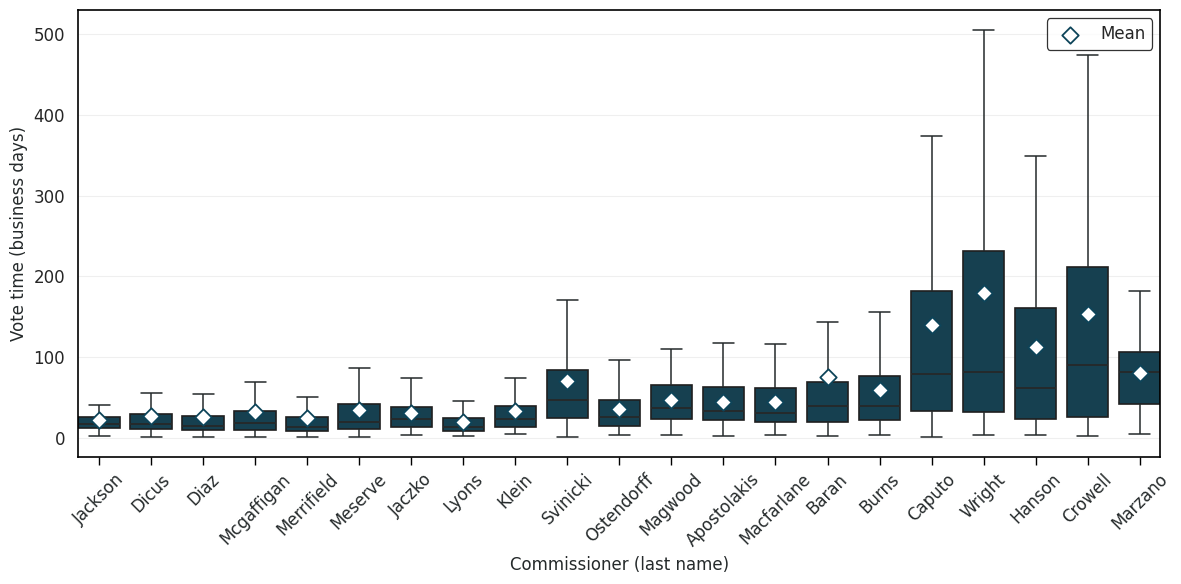

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ---- Brand palette (unchanged) ----
PALETTE = {
    "navy":   "#0D4459",  # primary accent (boxes/means)
    "sky":    "#56A9D5",
    "coal":   "#252A2B",  # outlines / text
    "paper":  "#F8F9F9"
}

# --- Font (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size']   = 12

sns.set_style("white")

# =========================================
# 0) Build the plotting table from NEW df
# =========================================
# Choose vote-time metric here if needed:
TIME_COL = "bdays_to_CVR"  # alternatives: bdays_to_CVR, bdays_CVR_to_SRM, bdays_to_SRM_original

data_plot = df.copy()

# Robust numeric vote time
data_plot[TIME_COL] = pd.to_numeric(data_plot[TIME_COL], errors="coerce")

# Make sure dates are parseable for ordering
data_plot["voter_start_date"] = pd.to_datetime(data_plot["voter_start_date"], errors="coerce")

# Drop missing essentials
data_plot = data_plot.dropna(subset=["voter_last_name", "voter_start_date", TIME_COL]).copy()

# Match your old casing behavior
data_plot["voter"] = data_plot["voter_last_name"].astype(str).str.strip().str.capitalize()
data_plot["Vote_Business_Days"] = data_plot[TIME_COL]

# =========================================
# 1) Order commissioners by earliest start (same logic)
# =========================================
earliest_start = (
    data_plot
      .groupby("voter", as_index=False)["voter_start_date"].min()
      .sort_values("voter_start_date")
)

voter_order = earliest_start["voter"].tolist()

# =========================================
# 2) Mean wait per voter for overlay (aligned to same order)
# =========================================
mean_wait_by_voter = (
    data_plot.groupby("voter", as_index=False)["Vote_Business_Days"]
             .mean()
             .set_index("voter")
             .reindex(voter_order)
             .reset_index()
             .rename(columns={"Vote_Business_Days": "mean_wait"})
)

# =========================================
# 3) Figure/axes
# =========================================
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# =========================================
# 4) Boxplot (same styling)
# =========================================
sns.boxplot(
    data=data_plot,
    x="voter", y="Vote_Business_Days",
    order=voter_order,
    showfliers=False,
    color=PALETTE["navy"],
    linewidth=1.2,
    medianprops=dict(color=PALETTE["coal"], linewidth=1.4),
    whiskerprops=dict(color=PALETTE["coal"], linewidth=1.1),
    capprops=dict(color=PALETTE["coal"], linewidth=1.1),
    ax=ax
)

# Hatching & edges
for patch in ax.artists:
    patch.set_edgecolor(PALETTE["coal"])
    patch.set_facecolor(PALETTE["navy"])
    patch.set_hatch("///")

# =========================================
# 5) Overlay means — white diamond
# =========================================
centers = ax.get_xticks()
ax.scatter(
    x=centers,
    y=mean_wait_by_voter["mean_wait"].to_numpy(),
    s=70,
    marker="D",
    facecolors="white",
    edgecolors=PALETTE["navy"],
    linewidths=1.3,
    zorder=10,
    label="Mean"
)

# =========================================
# 6) Axes labels, ticks, limits, styling
# =========================================
ax.set_xlabel("Commissioner (last name)", color=PALETTE["coal"])
ax.set_ylabel("Vote time (business days)", color=PALETTE["coal"])

ax.set_xticks(centers)
ax.set_xticklabels(voter_order, rotation=45, ha="center", color=PALETTE["coal"])

# Lock x-limits to the first/last box with a small half-width pad
halfw = (ax.artists[0].get_width() / 2.0) if ax.artists else 0.4
ax.set_xlim(centers[0] - halfw, centers[-1] + halfw)
ax.margins(x=0)

ax.tick_params(axis="x", direction="out", length=6, width=1, color="black", bottom=True, top=False)
ax.tick_params(axis="y", direction="out", length=6, width=1, color="black")

for spine in ax.spines.values():
    spine.set_color("black")
    spine.set_linewidth(1.2)

ax.grid(axis="y", linestyle="-", alpha=0.3)
ax.grid(axis="x", visible=False)

leg = ax.legend(frameon=True, loc="upper right")
leg.get_frame().set_edgecolor("black")
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


##Figure 7


Font family in use: DejaVu Serif
Chair order earliest → latest: ['Jackson', 'Dicus', 'Meserve', 'Diaz', 'Klein', 'Jaczko', 'Macfarlane', 'Burns', 'Svinicki', 'Hanson', 'Wright']


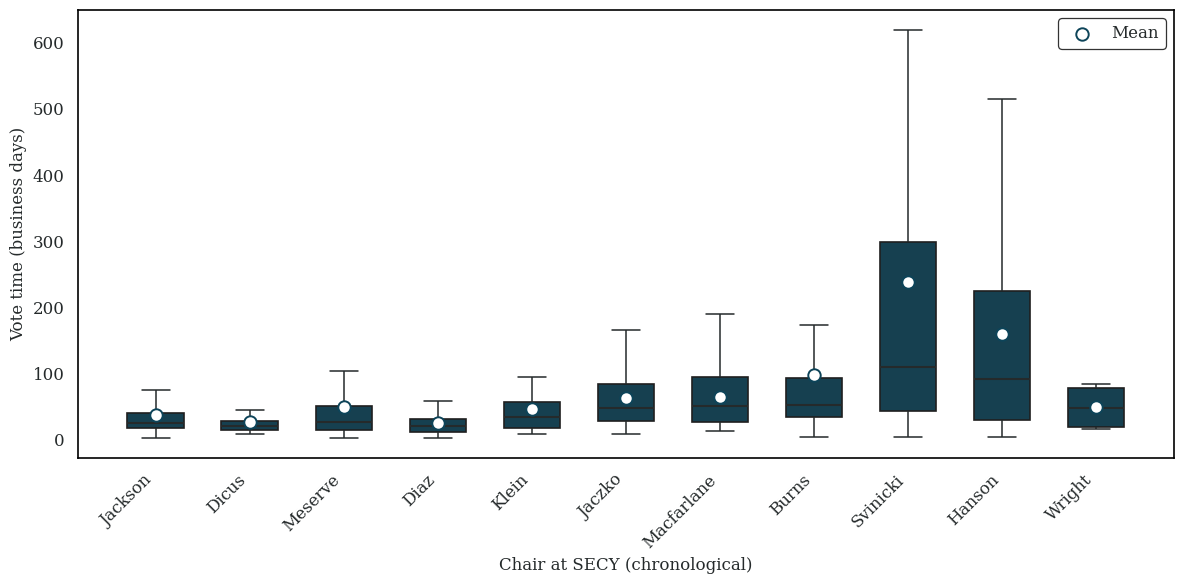

In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os, subprocess

# -----------------------------
# Font setup: use uploaded "Times New Roman" if present
# -----------------------------
def pick_times_family():
    fm._load_fontmanager(try_read_cache=False)
    names = {f.name for f in fm.fontManager.ttflist}

    if "Times New Roman" in names:
        return "Times New Roman"

    if "TeX Gyre Termes" not in names:
        try:
            subprocess.run(
                "apt-get update -qq && apt-get install -y -qq fonts-texgyre >/dev/null 2>&1",
                shell=True, check=False
            )
            subprocess.run("fc-cache -fv >/dev/null 2>&1", shell=True, check=False)
            fm._load_fontmanager(try_read_cache=False)
            names = {f.name for f in fm.fontManager.ttflist}
        except Exception:
            pass

    if "TeX Gyre Termes" in names:
        return "TeX Gyre Termes"
    return "DejaVu Serif"

sns.set_style("white")

chosen_family = pick_times_family()
mpl.rcParams.update({
    "font.family": chosen_family,
    "font.size": 12,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "savefig.facecolor": "white",
})

# -----------------------------
# Brand palette (your colors)
# -----------------------------
PALETTE = {
    "NAVY":   "#0D4459",
    "SKY":    "#56A9D5",
    "COAL":   "#252A2B",
}

# -----------------------------
# Data setup (NEW schema)
# -----------------------------
# Filter to last votes + keep needed columns
plot_df = df.loc[
    df["is_last_vote"] == True,
    ["chair_at_SECY", "CVR_date", "bdays_to_CVR_original"]
].dropna().copy()

# Parse vote date
plot_df["CVR_date"] = pd.to_datetime(plot_df["CVR_date"], errors="coerce")
plot_df = plot_df.dropna(subset=["CVR_date"]).copy()

# Chair order: earliest → latest by first observed vote date as chair
chair_order = (
    plot_df.groupby("chair_at_SECY")["CVR_date"]
           .min()
           .sort_values()
           .index
           .tolist()
)

print("Font family in use:", chosen_family)
print("Chair order earliest → latest:", chair_order)

# -----------------------------
# Plot styling
# -----------------------------
plt.rcParams.update({
    "axes.edgecolor": PALETTE["COAL"],
    "text.color": PALETTE["COAL"],
    "axes.labelcolor": PALETTE["COAL"],
    "xtick.color": PALETTE["COAL"],
    "ytick.color": PALETTE["COAL"],
})

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

bp = sns.boxplot(
    data=plot_df,
    x="chair_at_SECY",
    y="bdays_to_CVR_original",
    order=chair_order,
    showfliers=False,
    width=0.6,
    color=PALETTE["NAVY"],
    linewidth=1.2,
    medianprops=dict(color=PALETTE["COAL"], linewidth=1.5),
    whiskerprops=dict(color=PALETTE["COAL"], linewidth=1.1),
    capprops=dict(color=PALETTE["COAL"], linewidth=1.1),
    ax=ax
)

# Hatch pattern for grayscale
for patch in ax.artists:
    patch.set_edgecolor(PALETTE["COAL"])
    patch.set_facecolor(PALETTE["NAVY"])
    patch.set_hatch("///")

# Means overlay
means = (
    plot_df.groupby("chair_at_SECY")["bdays_to_CVR_original"]
           .mean()
           .reindex(chair_order)
)

centers = ax.get_xticks()
ax.scatter(
    x=centers,
    y=means.values,
    s=80,
    facecolors="white",
    edgecolors=PALETTE["NAVY"],
    linewidths=1.4,
    zorder=3,
    label="Mean"
)

# Legend
leg = ax.legend(
    frameon=True,
    loc="upper right",
    prop={"family": chosen_family, "size": 12}
)
leg.get_frame().set_edgecolor("black")
leg.get_frame().set_linewidth(0.9)

# Labels & ticks
ax.set_xlabel("Chair at SECY (chronological)", color=PALETTE["COAL"])
ax.set_ylabel("Vote time (business days)", color=PALETTE["COAL"])
plt.xticks(rotation=45, ha="right")

# Borders
for spine in ax.spines.values():
    spine.set_color("black")
    spine.set_linewidth(1.2)

ax.tick_params(axis="x", direction="out", length=6, width=1, color="black")
ax.tick_params(axis="y", direction="out", length=6, width=1, color="black")

plt.tight_layout()
plt.show()


##Figure 9

/tmp/ipython-input-245953629.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


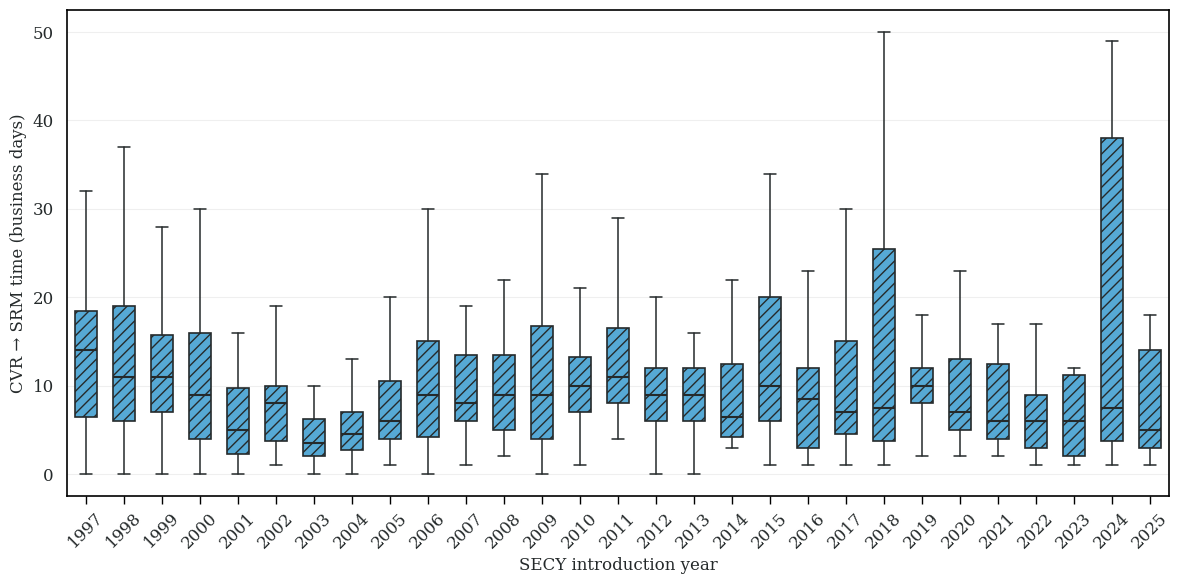

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Brand palette
# -----------------------------
PALETTE = {
    "NAVY":   "#0D4459",
    "SKY":    "#56A9D5",
    "COAL":   "#252A2B",
    "PAPER":  "#FFFFFF",
}

# -----------------------------
# Font / rcParams (Colab-safe Times fallback)
# -----------------------------
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times', 'DejaVu Serif'],
    'font.size': 12,
    'figure.facecolor': PALETTE["PAPER"],
    'savefig.facecolor': PALETTE["PAPER"],
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': PALETTE["COAL"],
    'xtick.color': PALETTE["COAL"],
    'ytick.color': PALETTE["COAL"],
})

# -----------------------------
# Prepare data (NEW schema, CVR → SRM)
# -----------------------------
vote_SRM_data = df[
    (df['is_last_vote'] == True) &
    (~df['bdays_CVR_to_SRM'].isna())
][['SECY_year', 'bdays_CVR_to_SRM']].copy()

# Ensure years are ints and sort
vote_SRM_data['SECY_year'] = pd.to_numeric(vote_SRM_data['SECY_year'], errors='coerce').astype('Int64')
vote_SRM_data = vote_SRM_data.dropna(subset=['SECY_year']).sort_values('SECY_year')

# Group to lists, in ascending year order
grouped = (vote_SRM_data
           .groupby('SECY_year')['bdays_CVR_to_SRM']
           .apply(list)
           .sort_index())

# Split into box data (<=1000) and extreme outliers (>1000) for optional overlay
box_data = []
outlier_x, outlier_y = [], []
years = grouped.index.to_numpy()

for i, values in enumerate(grouped):
    vals = np.asarray(values, dtype=float)
    box_vals = vals[vals <= 1000]
    outliers = vals[vals > 1000]
    box_data.append(box_vals.tolist())
    if outliers.size:
        outlier_x.extend([i + 1] * outliers.size)  # boxplot positions are 1..N
        outlier_y.extend(outliers.tolist())

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(PALETTE["PAPER"])
ax.set_facecolor('white')

bp = ax.boxplot(
    box_data,
    positions=np.arange(1, len(years) + 1),
    patch_artist=True,
    labels=years,
    showfliers=False,
    widths=0.6
)

# Style boxes: sky fill + hatch, coal edges
for box in bp['boxes']:
    box.set(facecolor=PALETTE["SKY"], edgecolor=PALETTE["COAL"], hatch="///", linewidth=1.2)
for med in bp['medians']:
    med.set(color=PALETTE["COAL"], linewidth=1.5)
for whisk in bp['whiskers']:
    whisk.set(color=PALETTE["COAL"], linewidth=1.1)
for cap in bp['caps']:
    cap.set(color=PALETTE["COAL"], linewidth=1.1)

# Labels
ax.set_xlabel('SECY introduction year', color=PALETTE["COAL"])
ax.set_ylabel('CVR → SRM time (business days)', color=PALETTE["COAL"])

# X ticks: all years, centered; fix limits for perfect centering
centers = np.arange(1, len(years) + 1)
ax.set_xticks(centers)
ax.set_xticklabels(years, rotation=45, ha='center')
ax.set_xlim(centers[0] - 0.5, centers[-1] + 0.5)
ax.margins(x=0)

# Grid (horizontal only) and borders
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Outward tick marks
ax.tick_params(axis='x', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')

# OPTIONAL: plot extreme outliers on same axes (uncomment to show)
# if outlier_x:
#     ax.scatter(outlier_x, outlier_y, s=35, facecolors='none',
#                edgecolors=PALETTE["NAVY"], linewidths=1.2, zorder=3, label='>1000 days')
#     ax.legend(frameon=True, loc='upper right')

plt.tight_layout()
plt.show()


##Table 1

In [29]:
secy_level =  df[df['is_last_vote'] == True]

In [31]:
import pandas as pd
import statsmodels.formula.api as smf

# -----------------------------
# Baseline: exclude SECY-23-0053
# -----------------------------
baseline_data = secy_level.loc[secy_level["SECY_number"] != "SECY-23-0053"].copy()

# Dependent variable in new schema
baseline_data["vote_days"] = pd.to_numeric(baseline_data["bdays_to_CVR_original"], errors="coerce")

# Drop missing essentials
baseline_data = baseline_data.dropna(subset=["vote_days", "same_chair"]).copy()

# OLS Regression — baseline (same as your spec, adapted DV name)
model = smf.ols(
    "vote_days ~ same_chair",
    data=baseline_data
).fit()

print("N (baseline):", len(baseline_data))
print(model.summary())


N (baseline): 1047
                            OLS Regression Results                            
Dep. Variable:              vote_days   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     316.9
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           3.98e-62
Time:                        05:07:15   Log-Likelihood:                -6444.1
No. Observations:                1047   AIC:                         1.289e+04
Df Residuals:                    1045   BIC:                         1.290e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept        

In [32]:
import pandas as pd
import statsmodels.formula.api as smf

# -----------------------------
# Baseline data (SECY-level already)
#   assumes you already created `secy_level` as one-row-per-SECY
#   with columns: SECY_number, same_chair, commissioner_count_average, bdays_to_CVR_original
# -----------------------------

# Exclude SECY-23-0053
baseline_data = secy_level.loc[secy_level["SECY_number"] != "SECY-23-0053"].copy()

# Ensure numeric DV
baseline_data["vote_days"] = pd.to_numeric(baseline_data["bdays_to_CVR_original"], errors="coerce")

# Ensure numeric commissioner count
baseline_data["com_count_average"] = pd.to_numeric(baseline_data["commissioner_count_average"], errors="coerce")

# Drop missing essentials
baseline_data = baseline_data.dropna(subset=["vote_days", "same_chair", "com_count_average"]).copy()

# If 5.0 is not present (after exclusions), pick a safe reference to avoid errors
levels = sorted(baseline_data["com_count_average"].dropna().unique().tolist())
ref = 5.0 if 5.0 in levels else (max(levels) if levels else 5.0)


# OLS Regression — baseline
model = smf.ols(
    f"vote_days ~ same_chair + C(com_count_average, Treatment(reference={ref}))",
    data=baseline_data
).fit()

print("N (baseline):", len(baseline_data))
print("com_count_average levels:", levels, "| reference:", ref)
print(model.summary())


N (baseline): 1047
com_count_average levels: [3.0, 3.5, 4.0, 4.5, 5.0] | reference: 5.0
                            OLS Regression Results                            
Dep. Variable:              vote_days   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     71.70
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           1.50e-64
Time:                        05:07:23   Log-Likelihood:                -6427.9
No. Observations:                1047   AIC:                         1.287e+04
Df Residuals:                    1041   BIC:                         1.290e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]


In [33]:
import pandas as pd
import statsmodels.formula.api as smf

# =========================
# 0) Build SECY-level dataset (one row per SECY)
#    Use last vote rows, then deduplicate SECY_number
# =========================
secy_level = df.loc[df["is_last_vote"] == True].copy()

# If the dataset still has multiple "last vote" rows per SECY (one per commissioner),
# keep exactly one row per SECY_number for SECY-level regression.
secy_level = secy_level.drop_duplicates(subset=["SECY_number"], keep="first").copy()

# =========================
# 1) Create / coerce variables used in the model
# =========================
# Dependent variable
secy_level["vote_days"] = pd.to_numeric(secy_level["bdays_to_CVR_original"], errors="coerce")

# Same chair indicator (SECY chair vs CVR chair)
# (This replaces your prior 'same_chair' column.)
secy_level["same_chair"] = (
    secy_level["chair_at_SECY"].astype(str).str.strip()
    == secy_level["chair_at_CVR"].astype(str).str.strip()
)

# Commissioner count variable (average across stages; float in your schema)
secy_level["com_count_average"] = pd.to_numeric(secy_level["commissioner_count_average"], errors="coerce")

# Responsible chair FE (object)
secy_level["responsible_chair"] = secy_level["responsible_chair"].astype(str).str.strip()

# Drop rows missing required fields
secy_level = secy_level.dropna(subset=["vote_days", "com_count_average", "responsible_chair", "same_chair"]).copy()

# Make commissioner count categorical with reference category 5.0 if present
# (If 5.0 is not present in your filtered sample, statsmodels will error; the safe fallback is below.)
levels = sorted(secy_level["com_count_average"].dropna().unique().tolist())
secy_level["com_count_average"] = pd.Categorical(secy_level["com_count_average"], categories=levels, ordered=True)

# Pick reference for Treatment coding
ref_level = 5.0 if 5.0 in levels else max(levels)  # fallback to largest available category

# =========================
# 2) OLS regression (SECY-level)
# =========================
formula = (
    f'vote_days ~ same_chair '
    f'+ C(com_count_average, Treatment(reference={ref_level})) '
    f'+ C(responsible_chair, Treatment(reference="Klein"))'
)

model = smf.ols(formula, data=secy_level).fit(cov_type="HC3")  # HC3 robust SEs (recommended)

print("N (SECY-level):", len(secy_level))
print("Commissioner-count levels:", levels, "| Reference:", ref_level)
print(model.summary())


N (SECY-level): 1048
Commissioner-count levels: [3.0, 3.5, 4.0, 4.5, 5.0] | Reference: 5.0
                            OLS Regression Results                            
Dep. Variable:              vote_days   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     14.89
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           4.17e-35
Time:                        05:07:27   Log-Likelihood:                -6322.0
No. Observations:                1047   AIC:                         1.268e+04
Df Residuals:                    1031   BIC:                         1.276e+04
Df Model:                          15                                         
Covariance Type:                  HC3                                         
                                                                       coef    std err          z      P>|z|      [0.02

## Table 2

Gradient Boosting Regressor (SECY-level) Model Evaluation:


,GBRT metric,Value
0,Observations (train),733.00
1,Observations (test),315.00
2,MSE,"11,533.46"
3,RMSE,107.39
4,MAE,37.44
5,R-squared,0.18


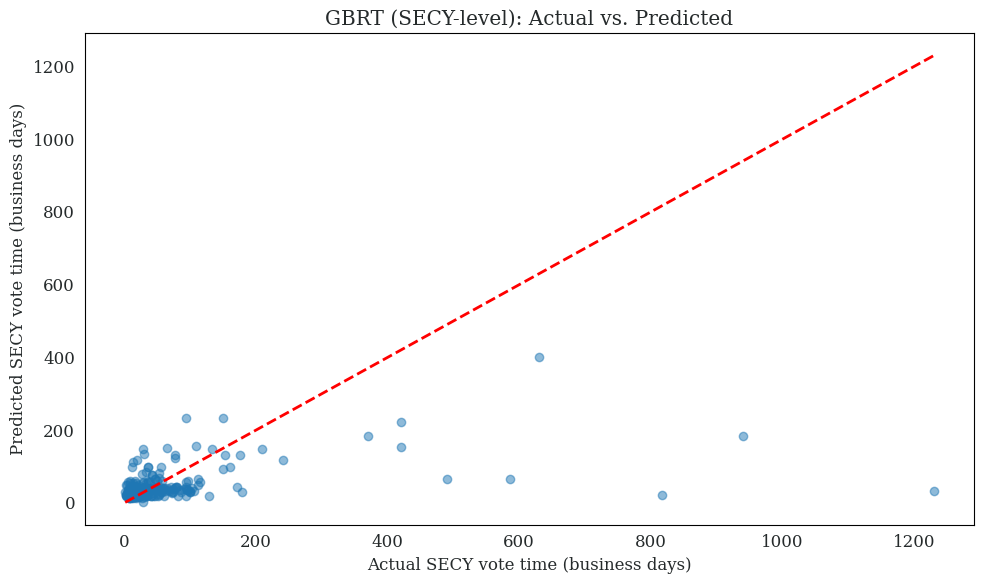

In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

# =========================
# 0) NEW dataset (df) — no renaming, just use new column names
# =========================
mwt = df.copy()

# =========================
# 1) SECY-level collapse (1 row per SECY_number)
#    - outcome = SECY-level vote time (bdays_to_CVR_original)
#    - predictors = SECY-level covariates (take first / mean as appropriate)
# =========================
features = [
    "commissioner_count_average",
    "is_commissioner_count_consistent",
    "voter_presidency_diff",
    "voter_congress_diff",
    "voter_days_served",
    "voter_term_number",
]
target = "bdays_to_CVR_original"   # <-- SECY-level DV (new name)

secy_id = "SECY_number"

# Collapse to one row per SECY_number (same aggregation structure as your original)
secy_level = (
    mwt[[secy_id] + features + [target]]
    .dropna(subset=[secy_id, target])
    .groupby(secy_id, as_index=False)
    .agg({
        target: "first",
        "commissioner_count_average": lambda s: s.dropna().iloc[0] if s.notna().any() else np.nan,
        "is_commissioner_count_consistent": "first",
        "voter_presidency_diff": "first",
        "voter_congress_diff": "first",
        "voter_days_served": "first",
        "voter_term_number": "first",
    })
)

# Drop rows missing any predictors you want to use
secy_level = secy_level.dropna(subset=features + [target]).copy()

# =========================
# 2) Dummies for categorical predictor(s)
# =========================
data = pd.get_dummies(
    secy_level[features + [target]],
    columns=["commissioner_count_average"],
    drop_first=True
)

X = data.drop(columns=[target])
y = data[target].astype(float)

# =========================
# 3) Train/test split (70% train / 30% test)
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# =========================
# 4) Fit GBRT
# =========================
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# =========================
# 5) Metrics + "Panel B" table
# =========================
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

gbrt_fit_table = pd.DataFrame({
    "GBRT metric": ["Observations (train)", "Observations (test)", "MSE", "RMSE", "MAE", "R-squared"],
    "Value": [len(y_train), len(y_test), mse, rmse, mae, r2]
})

gbrt_fit_table["Value"] = gbrt_fit_table["Value"].apply(
    lambda v: f"{v:,.2f}" if isinstance(v, (int, float, np.floating)) else v
)

print("Gradient Boosting Regressor (SECY-level) Model Evaluation:")
display(gbrt_fit_table)

# =========================
# 6) Plot: Actual vs Predicted
# =========================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual SECY vote time (business days)")
plt.ylabel("Predicted SECY vote time (business days)")
plt.title("GBRT (SECY-level): Actual vs. Predicted")
plt.tight_layout()
plt.show()
